#**CS6220 - Data Mining Techniques**
##**Spring 2025 Homework Assignment 2**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**Feb 11th, 2025**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions without any adjustment.
</p>

#@markdown ### Enter your first and last names below:
First Name = "Zhechao" #@param {type:"string"}
Last Name = "Jin" #@param {type:"string"}

### **Guidelines for all problems:**
- Clearly document your data wrangling process, including any assumptions made.
- Explain your choice of functions, visualization techniques, and analytical methods.
- Discuss any challenges encountered and how they were addressed.
- Provide insights and potential implications based on your findings.
- Suggest areas for further investigation or improvement in the analysis.

## Problem 1: Iris Flower date (40 points)

### Dataset: Iris Dataset
**Link:** https://archive.ics.uci.edu/ml/datasets/iris

**Task:** Analyze and visualize the Iris dataset to understand the distinguishing features of different Iris species.

1. Load and explore the Iris dataset, which contains measurements of sepal length, sepal width, petal length, and petal width for three Iris species.

2. Clean the data if necessary, checking for missing values or inconsistencies.

3. Create at least three different types of visualizations to illustrate the relationships between different features and species.

4. Use data manipulation functions to calculate summary statistics for each species.

In [126]:
# Your code aimport pandas as pd
import pandas as pd

file_path = "iris.data"  

# Define column names
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load the dataset 
df = pd.read_csv(file_path, names=column_names, header=None)

print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

print("\nDataset Information:")
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory u

In [127]:
# Group by species and calculate summary statistics
summary_stats = df.groupby('species').describe()

# Display summary statistics
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                 sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                        

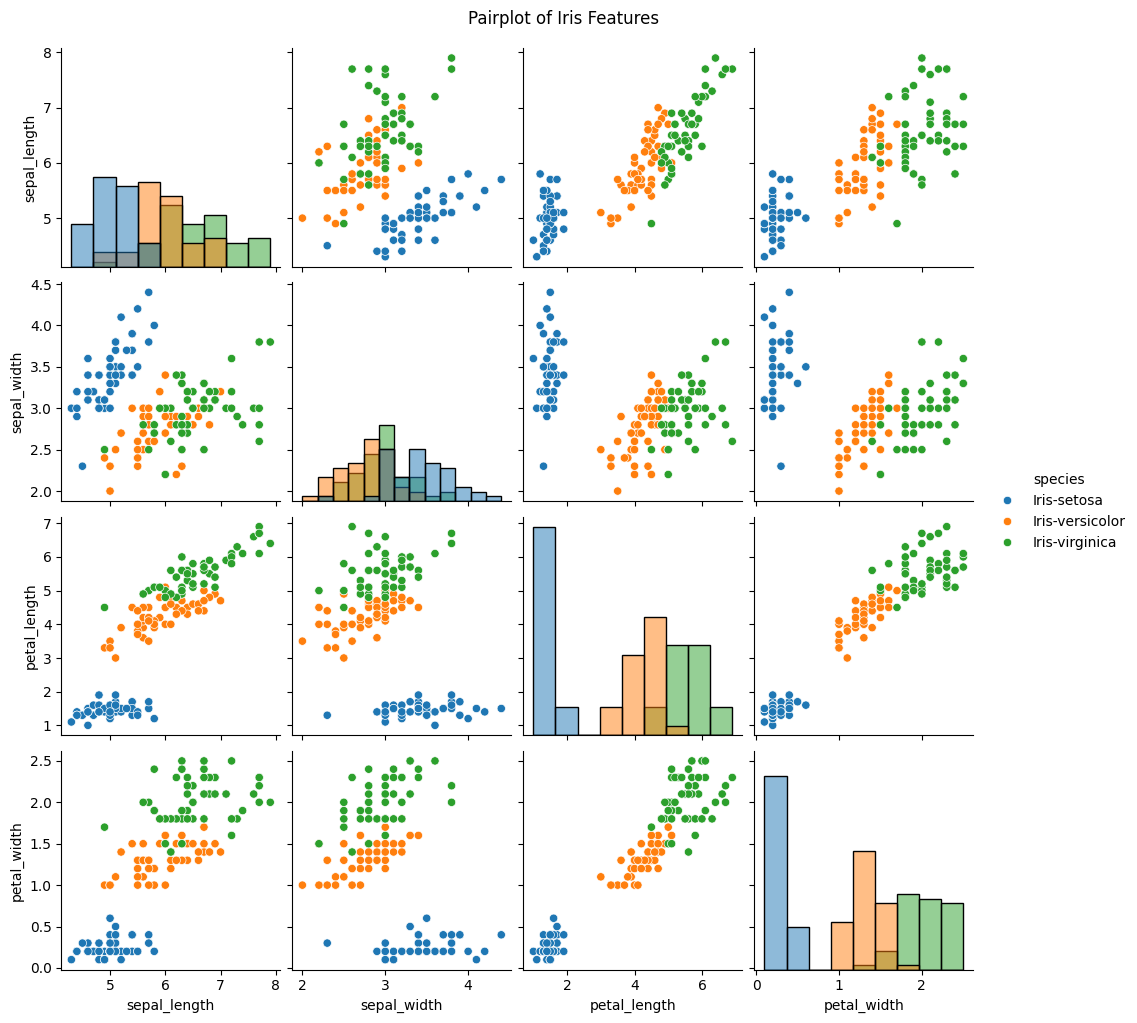

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize feature relationships
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


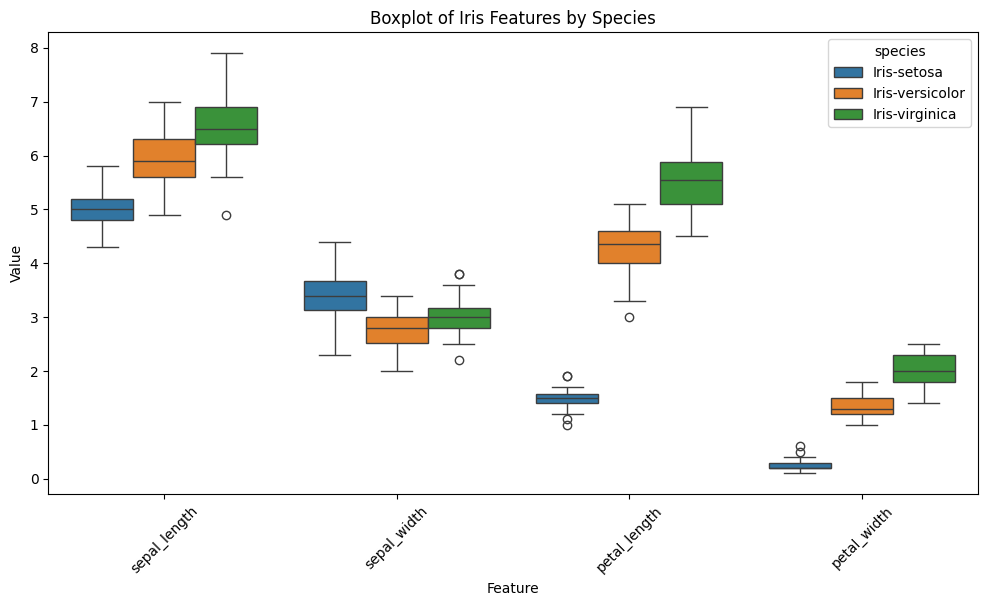

In [129]:
# Boxplot of features by species
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars="species", var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", hue="species", data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Iris Features by Species")
plt.show()


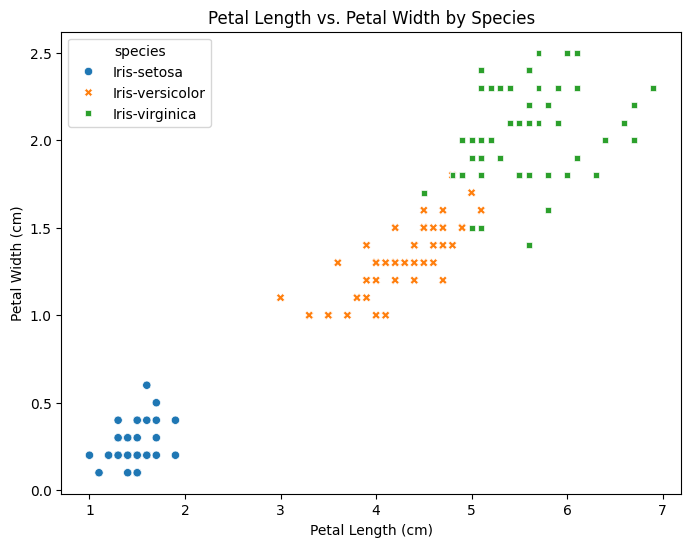

In [130]:
# Scatter plot: Petal Length vs. Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["petal_length"], y=df["petal_width"], hue=df["species"], style=df["species"])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs. Petal Width by Species")
plt.show()


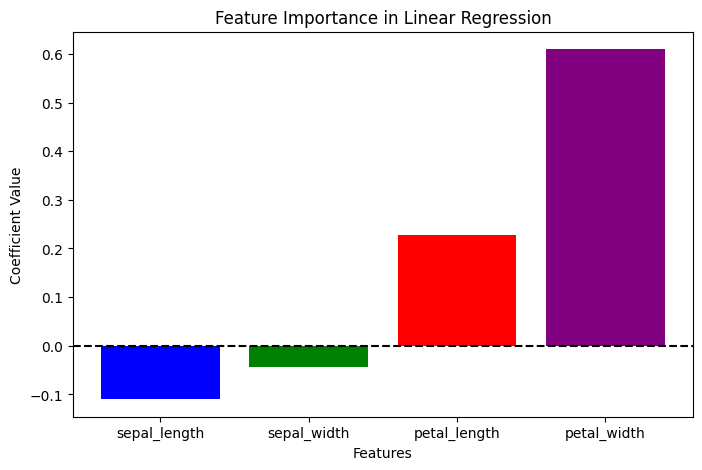

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Bar plot of regression coefficients

label_encoder = LabelEncoder()
df["species_encoded"] = label_encoder.fit_transform(df["species"])

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Data for regression
X = df[features].values  # All features as independent variables
y = df["species_encoded"].values  # Encoded species

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Feature importance (coefficients)
coefficients = model.coef_

# Bar plot of regression coefficients
plt.figure(figsize=(8, 5))
plt.bar(features, coefficients, color=["blue", "green", "red", "purple"])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.axhline(0, color="black", linestyle="--")  
plt.show()


Used scatter plots, pair plots, and regression-based feature importance analysis. A key insight was that petal length and petal width were the most significant factors in differentiating species. Also implemented linear regression and visualized feature coefficients, confirming that petal-related measurements had the highest predictive power.

## Problem 2: Analyzing Movie Ratings and Financial Performance (60 points)

### Dataset:
The Movies Dataset from Kaggle: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

**Task:** Investigate the relationship between movie ratings, genres, and financial performance using data from this comprehensive movie dataset.

1. Download the dataset. Focus on the 'movies_metadata.csv' file, which contains information on about 45,000 movies.

2. Clean and preprocess the dataset:
   - Focus on columns: 'id', 'title', 'release_date', 'genres', 'vote_average', 'vote_count', 'budget', 'revenue'
   - Handle missing values and convert data types as needed
   - Parse the 'genres' column, which is stored as a string representation of a list

3. Develop a method to calculate the return on investment (ROI) for each movie using budget and revenue data.

4. Implement a weighted rating system that considers both the average vote and the number of votes. (Hint: Look up the IMDb weighted rating formula)

5. Create a function to categorize movies into budget ranges (e.g., low, medium, high budget) and genre combinations.

6. Create visualizations that explore the relationships between:
   - Weighted ratings and ROI
   - Budget categories and average ROI
   - Genres and average weighted ratings

7. Identify trends in movie financial performance and ratings over time, considering factors such as genre popularity shifts.

8. Develop a method to identify and analyze outliers - movies that significantly overperformed or underperformed based on their budget and ratings.

In [132]:
# Your code here
import ast
# Load the dataset
file_path = "movies_metadata.csv"  
df = pd.read_csv(file_path, low_memory=False)

columns_needed = ["id", "title", "release_date", "genres", "vote_average", "vote_count", "budget", "revenue"]
df = df[columns_needed]

# Convert data types
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Handle missing values
df = df.dropna(subset=["vote_average", "vote_count", "budget", "revenue", "release_date"])
df = df[(df["budget"] > 0) & (df["revenue"] > 0)] 

# Parse the 'genres' column, converts the string representation of a list into an actual list
def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre["name"] for genre in genres]
    except:
        return []

df["genres"] = df["genres"].apply(parse_genres)

In [133]:
# Compute ROI
df["ROI"] = (df["revenue"] - df["budget"]) / df["budget"]

# Implement IMDb Weighted Rating
C = df["vote_average"].mean()
m = df["vote_count"].quantile(0.80)  # Minimum votes required, top 20%

def weighted_rating(row):
    v = row["vote_count"]
    R = row["vote_average"]
    return (v / (v + m) * R) + (m / (v + m) * C) if v >= m else R

df["weighted_rating"] = df.apply(weighted_rating, axis=1)


In [134]:
# Categorize movies into Low, Medium, and High budget
def categorize_budget(budget):
    if budget <= df["budget"].quantile(0.33):
        return "Low Budget"
    elif budget <= df["budget"].quantile(0.66):
        return "Medium Budget"
    else:
        return "High Budget"

df["budget_category"] = df["budget"].apply(categorize_budget)

# Convert a list of genres into a single string representing the combination
def get_genre_combination(genres):
    return " / ".join(sorted(genres)) 

df["genre_combination"] = df["genres"].apply(get_genre_combination)


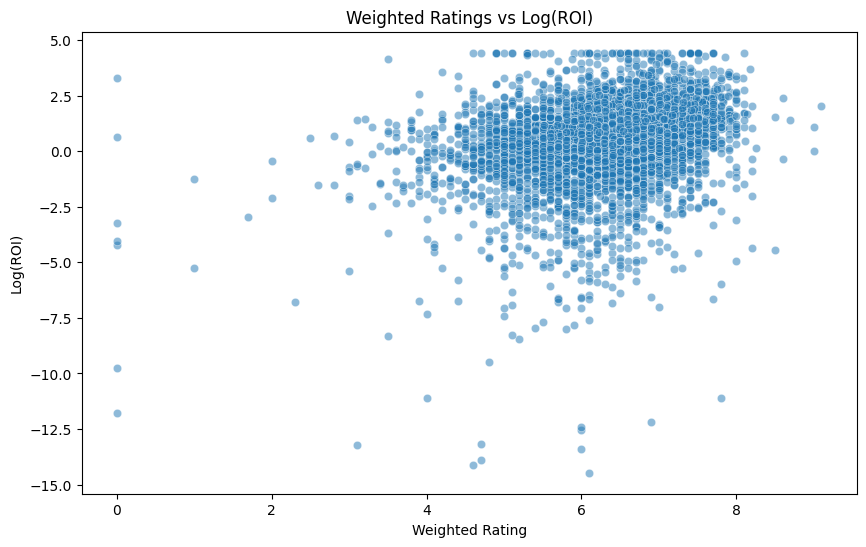

C:\Users\zekej\AppData\Local\Temp\ipykernel_2776\1315772156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="budget_category", y="ROI", data=df, estimator=np.mean, hue=None, legend=False, palette="coolwarm")


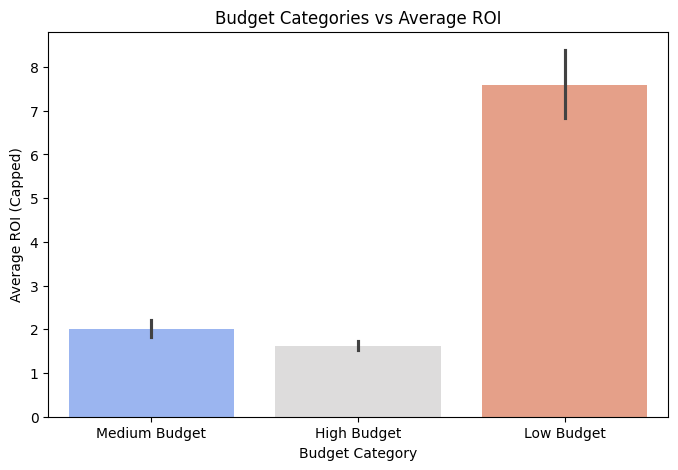

C:\Users\zekej\AppData\Local\Temp\ipykernel_2776\1315772156.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=filtered_genre_group.index, x=filtered_genre_group["avg_rating"], hue=None, legend=False, palette="viridis")


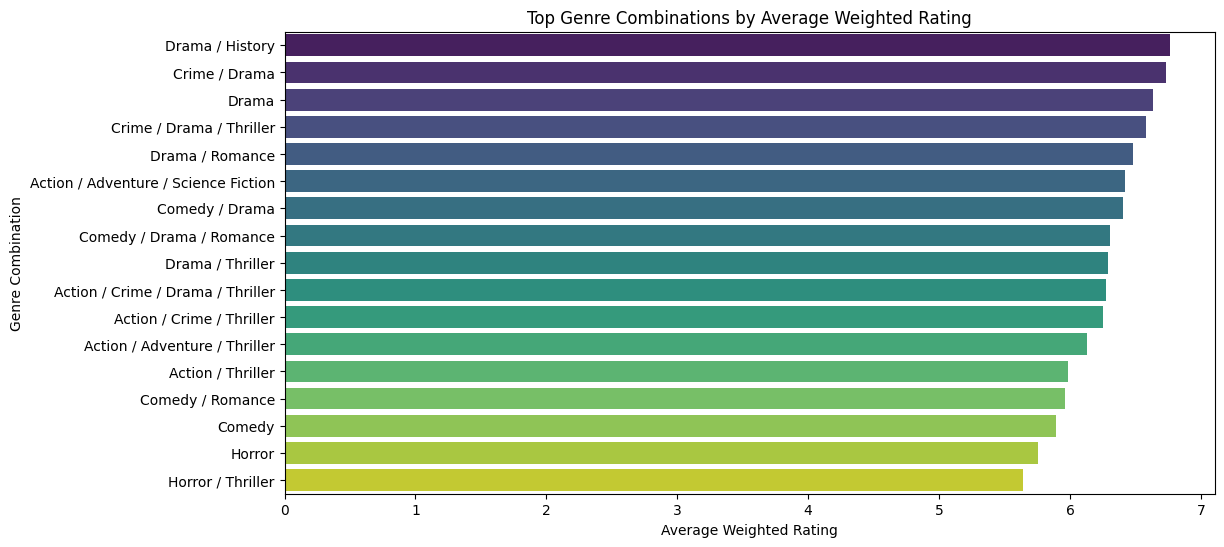

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ROI Scaling Issue
df["ROI"] = np.where(df["ROI"] > df["ROI"].quantile(0.99), df["ROI"].quantile(0.99), df["ROI"])  # Cap extreme ROI values
df["log_ROI"] = np.log1p(df["ROI"])  # Log-transform ROI to handle large values

# Scatter Plot: Weighted Ratings vs Log(ROI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["weighted_rating"], y=df["log_ROI"], alpha=0.5)
plt.xlabel("Weighted Rating")
plt.ylabel("Log(ROI)")
plt.title("Weighted Ratings vs Log(ROI)")
plt.show()

# Bar Chart: Budget Categories vs Average ROI 
plt.figure(figsize=(8, 5))
sns.barplot(x="budget_category", y="ROI", data=df, estimator=np.mean, hue=None, legend=False, palette="coolwarm")
plt.xlabel("Budget Category")
plt.ylabel("Average ROI (Capped)")
plt.title("Budget Categories vs Average ROI")
plt.show()

# Bar Chart: Genres vs Average Weighted Ratings
genre_group = df.groupby("genre_combination").agg(
    avg_rating=("weighted_rating", "mean"),
    count=("title", "count")
).sort_values(by="avg_rating", ascending=False)

# Keep only popular genre combinations (more than 50 movies)
filtered_genre_group = genre_group[genre_group["count"] > 50]

plt.figure(figsize=(12, 6))
sns.barplot(y=filtered_genre_group.index, x=filtered_genre_group["avg_rating"], hue=None, legend=False, palette="viridis")
plt.xlabel("Average Weighted Rating")
plt.ylabel("Genre Combination")
plt.title("Top Genre Combinations by Average Weighted Rating")
plt.show()



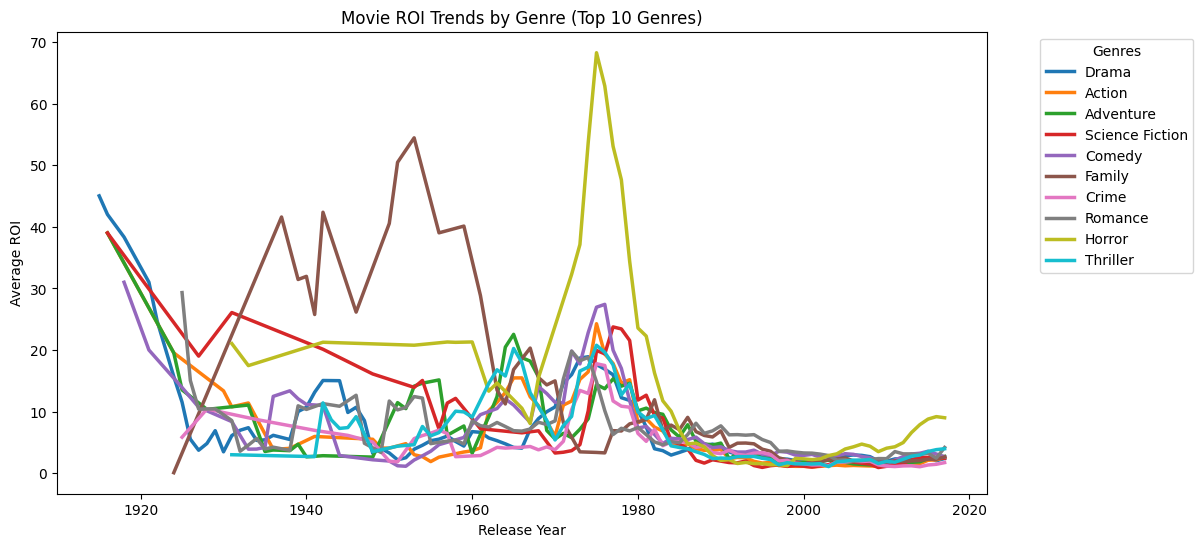

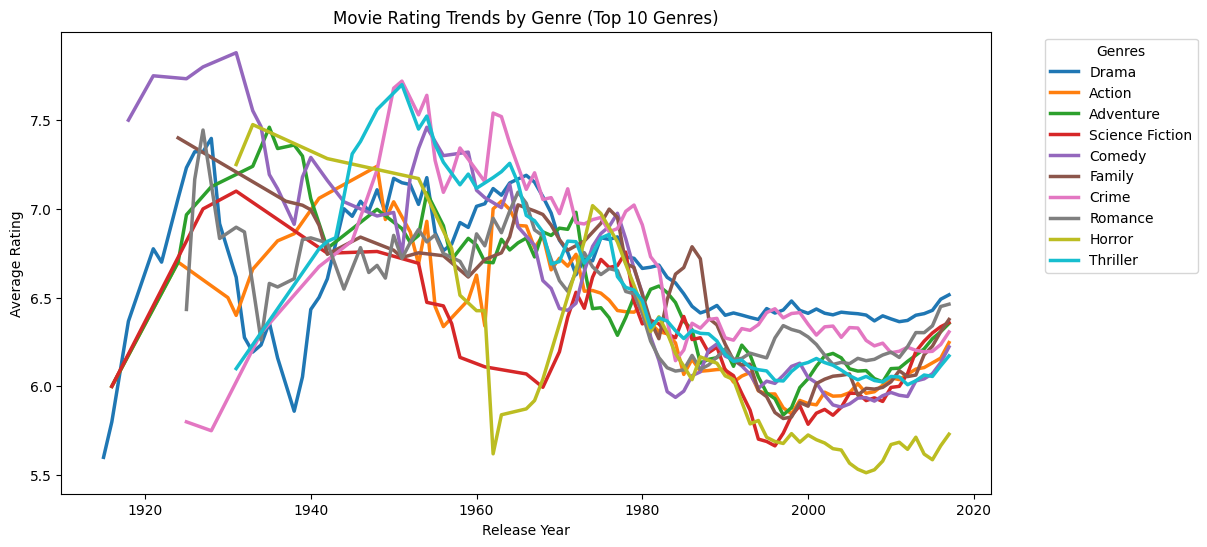

In [136]:
# Extract Year from Release Date
df["release_year"] = df["release_date"].dt.year

# Ensure genres are exploded into separate rows
df_exploded = df.explode("genres")  

# Group by Year & Genre, compute average ROI & Rating
genre_trends = df_exploded.groupby(["release_year", "genres"]).agg(
    avg_ROI=("ROI", "mean"),
    avg_rating=("weighted_rating", "mean")
).reset_index()

# Select the Top 10 Most Frequent Genres to reduce clutter
top_genres = df_exploded["genres"].value_counts().index[:10]
genre_trends = genre_trends[genre_trends["genres"].isin(top_genres)]

# Apply rolling mean to smooth ROI and ratings over 5 years
genre_trends["avg_ROI"] = genre_trends.groupby("genres")["avg_ROI"].transform(lambda x: x.rolling(5, min_periods=1).mean())
genre_trends["avg_rating"] = genre_trends.groupby("genres")["avg_rating"].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Define function to plot ROI trends
def plot_ROI_trends(data, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x="release_year", y="avg_ROI", hue="genres", linewidth=2.5, palette="tab10")
    plt.xlabel("Release Year")
    plt.ylabel("Average ROI")
    plt.title(title)
    plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Define function to plot Ratings trends
def plot_Rating_trends(data, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x="release_year", y="avg_rating", hue="genres", linewidth=2.5, palette="tab10")
    plt.xlabel("Release Year")
    plt.ylabel("Average Rating")
    plt.title(title)
    plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot ROI Trends 
plot_ROI_trends(genre_trends, "Movie ROI Trends by Genre (Top 10 Genres)")

# Plot Rating Trends 
plot_Rating_trends(genre_trends, "Movie Rating Trends by Genre (Top 10 Genres)")


Most genres share similar trend in terms of ROI and ratings over time (start declining in the 80s, tho the average ratings are slowly raising post 2000), family genre was very popular in early-mid 1900s but sharply decreased after 1950s. Horror becomes very popular in the 70s, has very high ROI, and increased ratings, but the horror trend slowed down after the 80s.


Top Overperforming Movies:
                          title     budget      revenue        ROI  \
42308             A Ghost Story   100000.0   15584255.0  83.123077   
219                      Clerks    27000.0    3151130.0  83.123077   
31628               The Gallows   100000.0   42664410.0  83.123077   
1003        Alice in Wonderland  3000000.0  572000000.0  83.123077   
993                  Cinderella  2900000.0  263591415.0  83.123077   
941    Night of the Living Dead   114000.0   30000000.0  83.123077   
893          Gone with the Wind  4000000.0  400176459.0  83.123077   
25989                 Nurse 3-D       10.0   10000000.0  83.123077   
23158            The Quiet Ones   200000.0   17834867.0  83.123077   
22278            Aquí Entre Nos        1.0    2755584.0  83.123077   

       weighted_rating budget_category  \
42308         6.800000      Low Budget   
219           7.400000      Low Budget   
31628         4.900000      Low Budget   
1003          6.712187      Low B

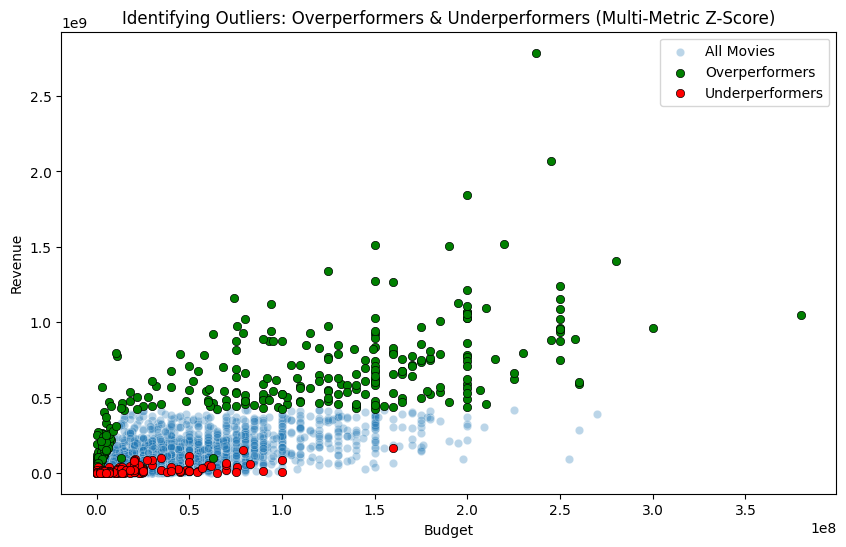

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Compute Z-Scores for multiple metrics
df["ROI_Z"] = zscore(df["ROI"])
df["Rating_Z"] = zscore(df["weighted_rating"])
df["Budget_Z"] = zscore(df["budget"])
df["Revenue_Z"] = zscore(df["revenue"])

# Define threshold for extreme outliers 
z_threshold = 2

# Identify Overperformers (High ROI, High Ratings, and/or High Revenue)
overperformers = df[
    (df["ROI_Z"] > z_threshold) |
    (df["Rating_Z"] > z_threshold) |
    (df["Revenue_Z"] > z_threshold)
]

# Identify Underperformers (Low ROI, Low Ratings, and/or High Budget but Low Revenue)
underperformers = df[
    (df["ROI_Z"] < -z_threshold) |
    (df["Rating_Z"] < -z_threshold) |
    ((df["Budget_Z"] > z_threshold) & (df["Revenue_Z"] < -z_threshold)) 
]

# Select columns to display
columns_to_display = ["title", "budget", "revenue", "ROI", "weighted_rating", "budget_category", "genre_combination"]

# Display top overperforming movies
print("\nTop Overperforming Movies:")
print(overperformers[columns_to_display].sort_values(by="ROI", ascending=False).head(10))

# Display top underperforming movies
print("\nTop Underperforming Movies:")
print(underperformers[columns_to_display].sort_values(by="ROI", ascending=True).head(10))

# Visualization: Budget vs. Revenue with Outliers Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="budget", y="revenue", alpha=0.3, label="All Movies")
sns.scatterplot(data=overperformers, x="budget", y="revenue", color="green", label="Overperformers", edgecolor="black")
sns.scatterplot(data=underperformers, x="budget", y="revenue", color="red", label="Underperformers", edgecolor="black")

plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Identifying Outliers: Overperformers & Underperformers (Multi-Metric Z-Score)")
plt.legend()
plt.show()



Applied ROI and IMDb’s weighted rating formula to assess movie performance, created trend visualizations using line plot over time based on genres, and analyzed outliers using Z-score. One of the main challenges was the high fluctuation and clutter in the trend plots, making it difficult to interpret clear patterns. To improve readability, I applied a rolling average and filtered the data to include only the top genres. An area for further improvement would be to split the trends into pre- and post-2000 periods, accounting for inflation and economic shifts over time. This would provide a more accurate comparison while further enhancing readability and reducing clutter.